In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-ott-revenue-and-subscribers-csv-file/Netflix Revenue.csv


In [8]:
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
df = pd.read_csv('/kaggle/input/netflix-ott-revenue-and-subscribers-csv-file/Netflix Revenue.csv')

In [10]:
pd.set_option('display.max_columns',25)
pd.set_option('display.max_rows',30)

In [11]:
df.dtypes #checking data types set by Pandas automatically

Date                            object
Global Revenue                   int64
UACN Revenue                   float64
EMEA Revenue                   float64
LATM Revenue                   float64
APAC Revenue                   float64
UACN Members                   float64
EMEA  Members                  float64
LATM Members                   float64
APAC Members                   float64
UACN RPU                       float64
EMEA RPU                       float64
LATM  RPU                      float64
APAC  RPU                      float64
Domestic Members               float64
Domestic Revenue               float64
International Members          float64
International Revenue          float64
Domestic Free Trialers         float64
Interntaional Free Trialers    float64
Netflix Global Users            object
dtype: object

In [12]:
df['Date']= df['Date'].astype('datetime64')

/tmp/ipykernel_35/2812312410.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']= df['Date'].astype('datetime64')


In [13]:
df['Global Revenue'] = df['Global Revenue'].astype('int')

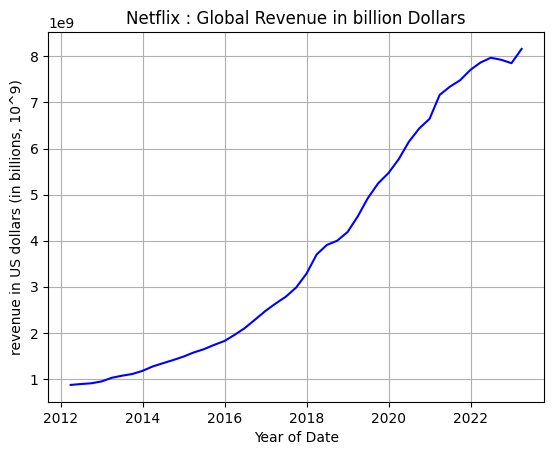

In [15]:
#Plotting Date vs Global Revenue 
plt.plot('Date','Global Revenue',data=df,color='b')
plt.xlabel('Year of Date')
plt.ylabel('revenue in US dollars (in billions, 10^9)')
plt.title('Netflix : Global Revenue in billion Dollars')
plt.grid(True)
plt.show()

In [17]:
#Setting Required Series for Region Wise Revenue
x_time = df['Date'][28::] #(before 2019, region wise data is not available)
UACN = df['UACN Revenue'][28::]
EMEA = df['EMEA Revenue'][28::]
LATM= df['LATM Revenue'][28::]
APAC = df['APAC Revenue'][28::]
#Resetting Index of Each series to 0 because it was 28 , otherwise it will show key error.
APAC.reset_index(drop=True,inplace=True)
EMEA.reset_index(drop=True,inplace=True)
LATM.reset_index(drop=True,inplace=True)
UACN.reset_index(drop=True,inplace=True)
x_time.reset_index(drop=True,inplace=True)

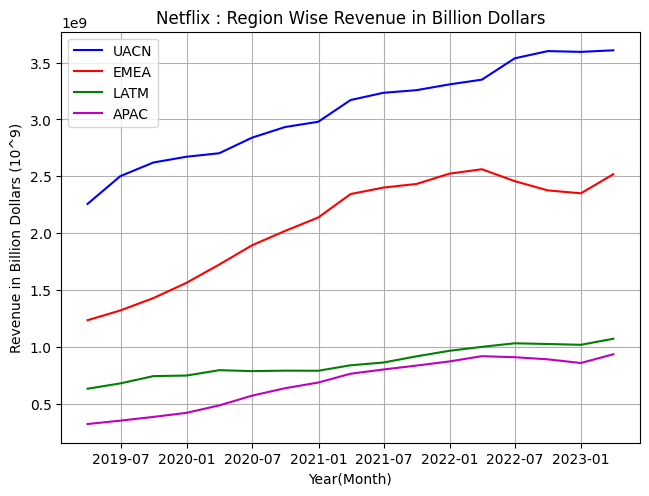

In [19]:
#Plotting Date vs Region Wise Revenue
plt.plot(x_time,UACN,color='b',label='UACN')
plt.plot(x_time,EMEA,color='r',label='EMEA')
plt.plot(x_time,LATM,color='g',label='LATM')
plt.plot(x_time,APAC,color='m',label='APAC')
plt.legend()
# plt.margins(0.15) #Default margin around data limits is 5%(0.05)
plt.tight_layout() #maintain good layout
plt.xlabel('Year(Month)')
plt.ylabel('Revenue in Billion Dollars (10^9)')
plt.title('Netflix : Region Wise Revenue in Billion Dollars')
plt.grid(True)
plt.show()



In [20]:
#Setting Required Series for Region wise membership
uacn_members = df['UACN Members'][28::]
emea_members = df['EMEA  Members'][28::]
apac_members = df['APAC Members'][28::]
latm_members = df['LATM Members'][28::]
#Resetting Index
uacn_members.reset_index(drop=True,inplace=True)
emea_members.reset_index(drop=True,inplace=True)
latm_members.reset_index(drop=True,inplace=True)
apac_members.reset_index(drop=True,inplace=True)

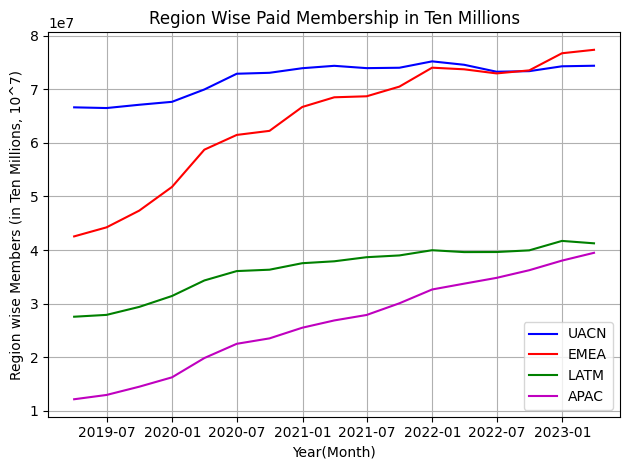

In [22]:
#Plotiing date vs Region Wise Membership
plt.plot(x_time,uacn_members,color='b',label='UACN')
plt.plot(x_time,emea_members,color='r',label='EMEA')
plt.plot(x_time,latm_members,color='g',label='LATM')
plt.plot(x_time,apac_members,color='m',label='APAC')
plt.legend()
plt.xlabel('Year(Month)')
plt.ylabel('Region wise Members (in Ten Millions, 10^7)')
plt.title('Region Wise Paid Membership in Ten Millions')
plt.grid(True)
plt.tight_layout()

In [24]:
#Setting Required Series for Region Wise RPU
uacn_rpu = df['UACN RPU'][28::]
emea_rpu = df['EMEA RPU'][28::]
latm_rpu = df['LATM  RPU'][28::]
apac_rpu = df['APAC  RPU'][28::]
#Resetting Index
uacn_rpu.reset_index(drop=True,inplace=True)
emea_rpu.reset_index(drop=True,inplace=True)
latm_rpu.reset_index(drop=True,inplace=True)
apac_rpu.reset_index(drop=True,inplace=True)

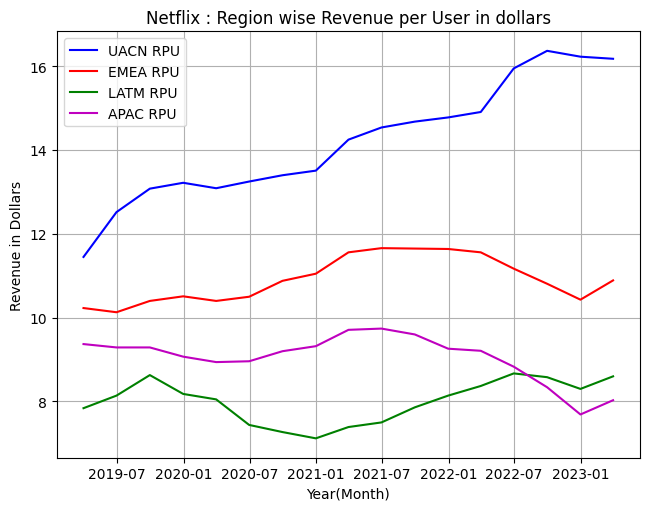

In [25]:
plt.plot(x_time,uacn_rpu,color='b',label='UACN RPU')
plt.plot(x_time,emea_rpu,color='r',label='EMEA RPU')
plt.plot(x_time,latm_rpu,color='g',label='LATM RPU')
plt.plot(x_time,apac_rpu,color='m',label='APAC RPU')
plt.legend()
plt.tight_layout()
plt.title('Netflix : Region wise Revenue per User in dollars')
plt.xlabel('Year(Month)')
plt.ylabel('Revenue in Dollars')
plt.grid(True)
plt.show()